In [1]:
#imports
import math
import random
import pandas as pd
import numpy as np
import os
import networkx as nx
import matplotlib.pyplot as plt
import collections
from operator import itemgetter
import geopandas
from matplotlib.colors import ListedColormap
import sys
import gc
import pylab
import plotly.express as px
from collections import Counter
from plotly import io
import plotly

## Data importing and preprocessing

In [2]:
# listing the Excels Files

excel_list1 = os.listdir("Raw_Data")
excel_list = []
for i in excel_list1:
    if(i.endswith(".csv")):
        excel_list.append(i)   
excel_list.sort()

In [3]:
def dates(s):
    year = s[:2]
    month = s[2:4]
    return "20" + year + "-" + month + "-" + "01"

In [4]:
same_city = {"DABOLIM":"GOA","Jharsuguda":"JHARSUGUDA","KADAPA":"CUDDAPAH","PONDICHERRY":"PUDUCHERRY"}

## Directed Weighted Network Creation

In [5]:
# Creating networks and stroing them
coordinates = pd.read_csv("Raw_Data/coordinates/sorted_coordinates.csv",header=0,index_col= 0)
print(coordinates)

max_weight = 0
min_weight = 10000000000
graphs = []

passengers1 = []  # records number of total passengers(month wise)
lbls = []
lbls2 = []
tt = 0


monthstogether = 3
passengers = []    # records number of total passengens for given combined months


while (tt < len(excel_list)):
    i = excel_list[tt]
    lbls2.append(dates(i))
    path = "Raw_Data/"+i
    lbls.append(i[:-4])
    cities = {}
    G = nx.DiGraph()
    xmonths = Counter()
    
    for jj in range(tt,min(tt+monthstogether,len(excel_list))):
        
        path = path = "Raw_Data/" + excel_list[jj]
        excel = pd.read_csv(path ,header=0, index_col=0, usecols = [0,1,2,3,4] ,names=["SNo","city1","city2","to","from"] )
        

        
        for i in range(1,len(excel)+1):
            city1 = excel["city1"][i]
            city2 = excel["city2"][i]
            
            
            if city1 in same_city:
                city1 = same_city[city1]
        
            if city2 in same_city:
                city2 = same_city[city2]
            cities[city1] = (coordinates["Longitude"][city1],coordinates["Latitude"][city1])
            cities[city2] = (coordinates["Longitude"][city2],coordinates["Latitude"][city2])
            
            citypair1 = (city1,city2)
            citypair2 = (city2,city1)
            
            xmonths[citypair1] += excel["to"][i]
            xmonths[citypair2] += excel["from"][i]

            if xmonths[citypair2] == 0:
                xmonths.pop(citypair2)
            if xmonths[citypair1] == 0:
                xmonths.pop(citypair1) 
        passengers1.append(sum(excel["to"]) + sum(excel["from"]))
            
            
    for i in cities:
        G.add_node(i, pos= cities[i])


    print(path)
    for jj in xmonths:
        G.add_edge(jj[0],jj[1],weight=xmonths[jj])
        max_weight = max(max_weight,xmonths[jj])
        min_weight = min(min_weight, xmonths[jj])
    print(excel)
    graphs.append(G)
    passengers.append(sum(list(xmonths.values())))
    tt += monthstogether

graphslen = len(graphs)
#print(cities)

               Latitude  Longitude
Cities                            
ADAMPUR          31.430     75.750
AGARTALA         23.887     91.240
AGATTI ISLAND    10.824     72.176
AGRA             27.156     77.961
AHMEDABAD        23.077     72.635
...                 ...        ...
VADODARA         22.336     73.226
VARANASI         25.452     82.859
VIDYANAGAR       15.170     76.620
VIJAYAWADA       16.530     80.797
VISAKHAPATNAM    17.721     83.224

[120 rows x 2 columns]
Raw_Data/1509.csv
             city1      city2     to   from
SNo                                        
1    AGATTI ISLAND  BENGALURU     44     47
2    AGATTI ISLAND      KOCHI    475    600
3             AGRA      DELHI      0      5
4             AGRA  KHAJURAHO     31      0
5             AGRA   VARANASI      0    131
..             ...        ...    ...    ...
325       VADODARA    CHENNAI    538    512
326       VADODARA      DELHI  13943  14183
327       VADODARA  HYDERABAD    476    533
328       VADODARA 

Raw_Data/1903.csv
             city1          city2     to   from
SNo                                            
1          ADAMPUR          DELHI   2333   2303
2         AGARTALA        CHENNAI   1392   1733
3         AGARTALA         JAIPUR      0    110
4         AGARTALA  VISAKHAPATNAM    151      0
5    AGATTI ISLAND      BENGALURU     86     62
..             ...            ...    ...    ...
510       VADODARA          KOCHI     24      0
511       VADODARA      MANGALORE    109      0
512       VADODARA         MUMBAI  15634  13720
513       VADODARA     PORT BLAIR      2      0
514     VIJAYAWADA  VISAKHAPATNAM   2409   2176

[514 rows x 4 columns]
Raw_Data/1906.csv
          city1          city2    to  from
SNo                                       
1       ADAMPUR          DELHI  2275  2172
2      AGARTALA      BENGALURU  2945  2710
3      AGARTALA        CHENNAI  2125  2002
4      AGARTALA     COIMBATORE     0    17
5      AGARTALA          DELHI  2669  2652
..          ...

In [6]:
print(lbls2)
print(lbls)

['2015-07-01', '2015-10-01', '2016-01-01', '2016-04-01', '2016-07-01', '2016-10-01', '2017-01-01', '2017-04-01', '2017-07-01', '2017-10-01', '2018-01-01', '2018-04-01', '2018-07-01', '2018-10-01', '2019-01-01', '2019-04-01', '2019-07-01', '2019-10-01', '2020-01-01', '2020-04-01', '2020-07-01', '2020-10-01']
['1507', '1510', '1601', '1604', '1607', '1610', '1701', '1704', '1707', '1710', '1801', '1804', '1807', '1810', '1901', '1904', '1907', '1910', '2001', '2004', '2007', '2010']


In [7]:
lbls1 = []
month = {"01":"Jan", "02":"Feb", "03":"March", "04":"April", "05":"May", "06":"June", "07":"July", "08":"Aug", 
        "09":"Sep", "10":"Oct", "11":"Nov", "12":"Dec"}
for e in lbls:
    lbls1.append(month[e[2:]]+e[:2])

In [8]:
print(lbls1)

['July15', 'Oct15', 'Jan16', 'April16', 'July16', 'Oct16', 'Jan17', 'April17', 'July17', 'Oct17', 'Jan18', 'April18', 'July18', 'Oct18', 'Jan19', 'April19', 'July19', 'Oct19', 'Jan20', 'April20', 'July20', 'Oct20']


In [9]:
# coordinates has city, lat, long -> <class 'pandas.core.frame.DataFrame'>

df = geopandas.read_file("shapefile/india_states.shp")


In [10]:
print(df)

               ST_NM  ST_ID  ID  \
0    Jammu & Kashmir  IN-JK  JK   
1            Gujarat  IN-GJ  GJ   
2            Gujarat  IN-GJ  GJ   
3            Gujarat  IN-GJ  GJ   
4            Gujarat  IN-GJ  GJ   
..               ...    ...  ..   
266           Odisha  IN-OR  OR   
267        Jharkhand  IN-JH  JH   
268     NCT of Delhi  IN-DL  DL   
269        Telangana  IN-TG  TG   
270       Puducherry  IN-PY  PY   

                                              geometry  
0    MULTIPOLYGON (((75.88864 32.57603, 75.84635 32...  
1    POLYGON ((72.67653 21.15570, 72.70319 21.14625...  
2    POLYGON ((72.35319 21.61347, 72.36291 21.60069...  
3    POLYGON ((72.72264 21.66597, 72.74597 21.65875...  
4    POLYGON ((72.27431 21.74958, 72.28264 21.73458...  
..                                                 ...  
266  POLYGON ((87.49020 21.60265, 87.47440 21.59988...  
267  POLYGON ((83.50607 24.52589, 83.55031 24.52505...  
268  POLYGON ((77.34765 28.50346, 77.31673 28.48519...  
269  POLY

In [11]:
colors = ['#fafa6e','#72cf85', '#00ffff','#00968e', '#1b6474','#9966ff','#ff66cc','#993366',
          '#ff5050','#ff3300','#cc3300','#993300','#800000',]


for i in range(len(lbls)):
    print(i)
    df.boundary.plot()

    #cmap = ListedColormap(['#fafa6e', '#e1f470','#c9ee73', '#b2e777', '#9cdf7c', '#86d780', '#72cf85', '#5ec688', '#4abd8c', '#37b38e',
    #     '#23aa8f', '#0ba08f', '#00968e', '#008c8b', '#008288', '#007882', '#106e7c', '#1b6474', '#225b6c', '#275162',
    #     '#2a4858'])
    cmap = ListedColormap(colors)
    
#     edges, weights = zip(*nx.get_edge_attributes(graphs[i],'weight').items())
#     nx.draw(graphs[i], nx.get_node_attributes(graphs[i],'pos'),node_size = 50, node_color='b', edgelist=edges, 
#         edge_color=weights, width=1.0, edge_cmap=cmap, vmin=min_weight, vmax=max_weight)

    try:
        edges, weights = zip(*nx.get_edge_attributes(graphs[i],'weight').items())
        nx.draw(graphs[i], nx.get_node_attributes(graphs[i],'pos'),node_size = 50, node_color='b', edgelist=edges, 
            edge_color=weights, width=1.0, edge_cmap=cmap, vmin=min_weight, vmax=max_weight)
    except:
        print("HAHAHA")
        nx.draw_networkx(graphs[i],nx.get_node_attributes(graphs[i],'pos'),font_color = "red")
    
    

#     figure.set_size_inches(100, 100)
    
    
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin = min_weight, vmax=max_weight))
    sm._A = []
    cb = plt.colorbar(sm)
    cb.ax.tick_params(labelsize=15) 
    cb.set_label(label='Number of Passengers',weight='bold',size = 20)


    plt.title("Airport Network Of India from "+ lbls2[i] + " for "+ str(monthstogether)+ " months")
    
    figure = plt.gcf()
    figure.set_size_inches(30, 30)
    
    plt.savefig('Output_Files/matplotlib/map/'+lbls[i])
    #plt.savefig(lbls[i])
 
    #plt.show()
    plt.clf()
    plt.close()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


## Network Visualization

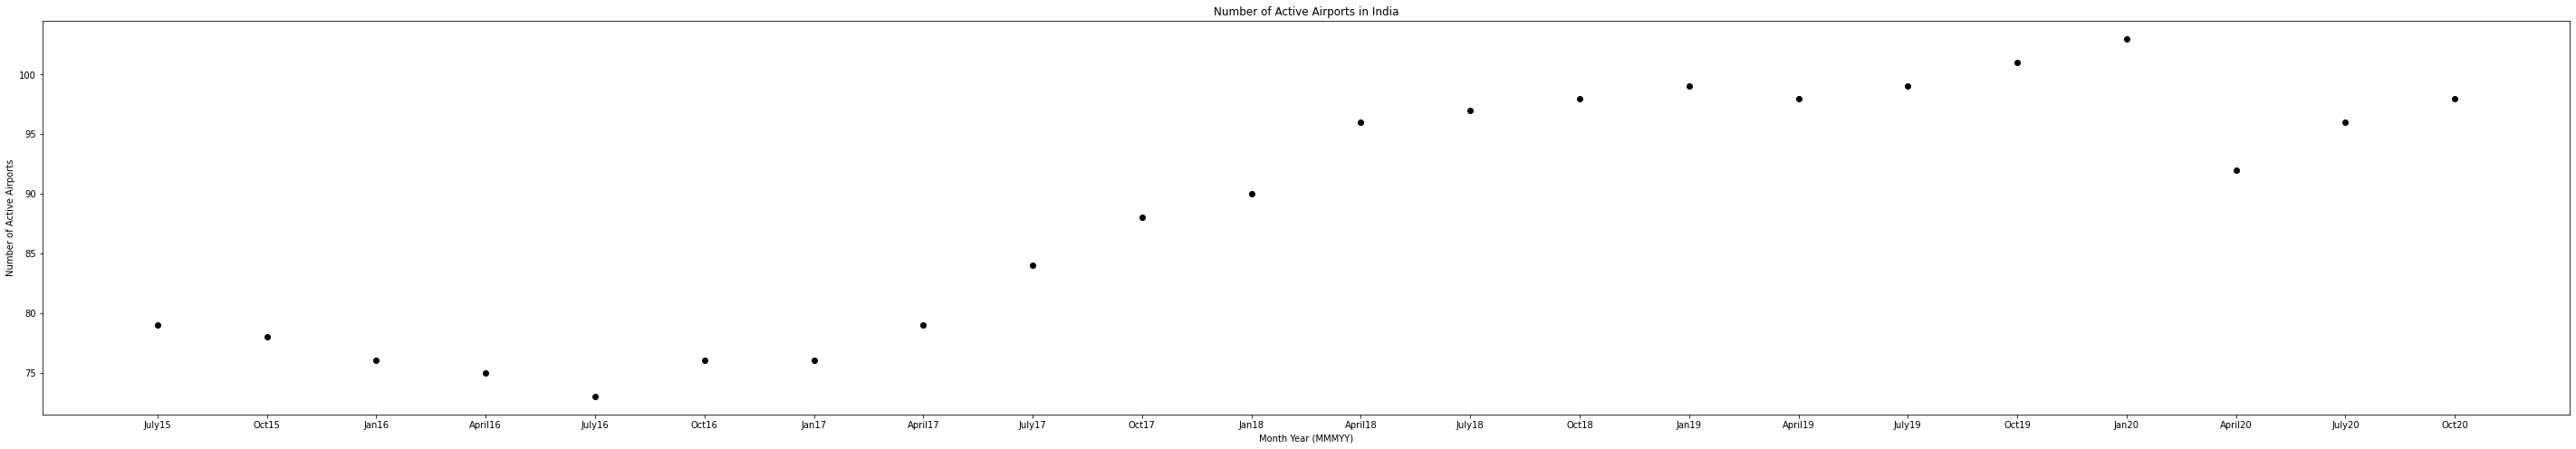

In [12]:
nodes = []
for i in range(len(graphs)):
    nodes.append(len(graphs[i].nodes()))
plt.scatter(lbls1, nodes, color="black", marker="o")
plt.xlabel("Month Year (MMMYY)")

plt.xticks([i for i in range(graphslen)], labels = lbls1)
plt.ylabel("Number of Active Airports")
plt.title("Number of Active Airports in India")
# plt.grid(True)

figure = plt.gcf()
figure.set_size_inches(50, 8)
plt.savefig('Output_Files/matplotlib/nodes')
plt.show()

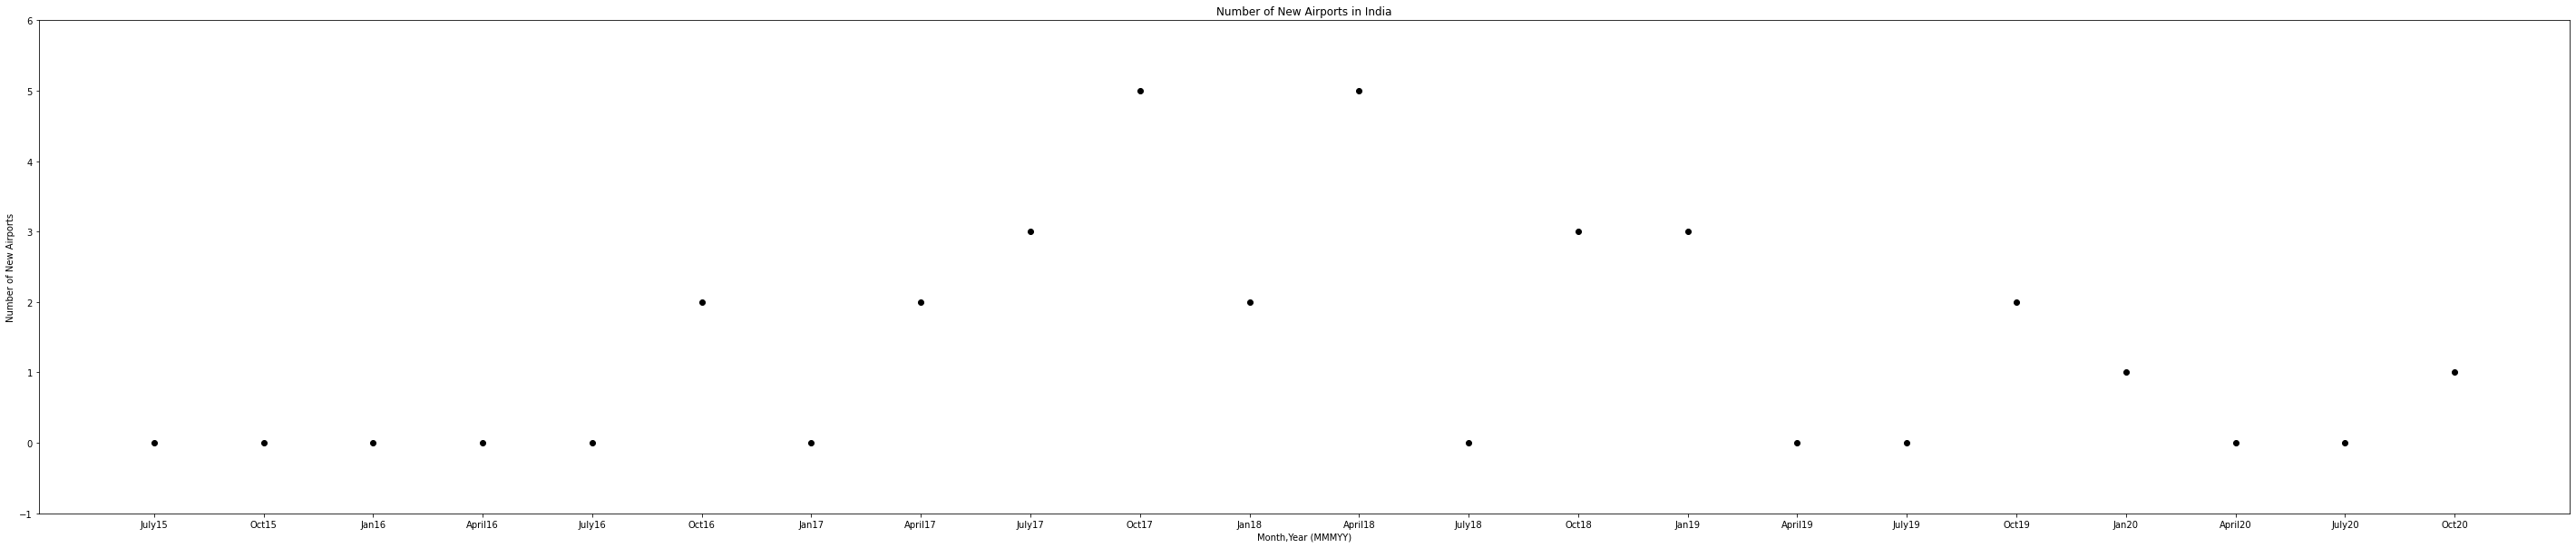

In [13]:
nnodes = []
airpor = {} 
for i in range(len(graphs)):
    temp = 0
    for j in graphs[i].nodes():
        if j not in airpor:
            airpor[j]=  1
            temp += 1
    nnodes.append(temp)
nnodes[0] = 0

plt.scatter(lbls1, nnodes, color="black", marker="o")
plt.xlabel("Month,Year (MMMYY)")
plt.xticks([i for i in range(graphslen)], labels = lbls1)
plt.ylabel("Number of New Airports")
plt.title("Number of New Airports in India")
# plt.grid(True)
plt.ylim(-1,6)
figure = plt.gcf()
figure.set_size_inches(50, 10)
plt.savefig('Output_Files/matplotlib/newnodes')
plt.show()
plt.clf()
plt.close()


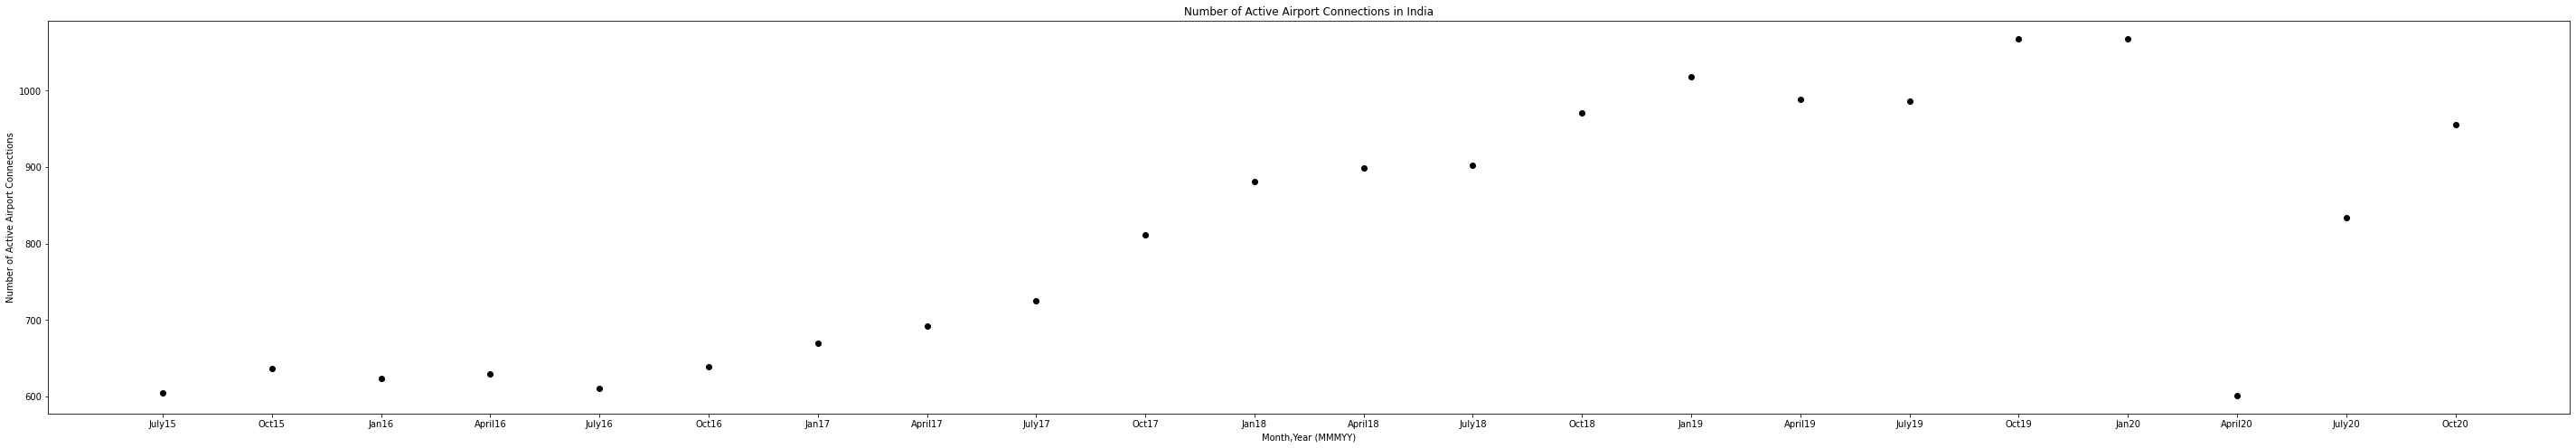

In [14]:
edges = []
for i in range(len(graphs)):
    edges.append(len(graphs[i].edges()))
plt.scatter(lbls1, edges, color="black", marker="o")
plt.xlabel("Month,Year (MMMYY)")
plt.xticks([i for i in range(graphslen)], labels = lbls1)
plt.ylabel("Number of Active Airport Connections")
plt.title("Number of Active Airport Connections in India")
# plt.grid(True)
figure = plt.gcf()
figure.set_size_inches(50, 8)
plt.savefig('Output_Files/matplotlib/edges')
plt.show()
plt.clf()
plt.close()

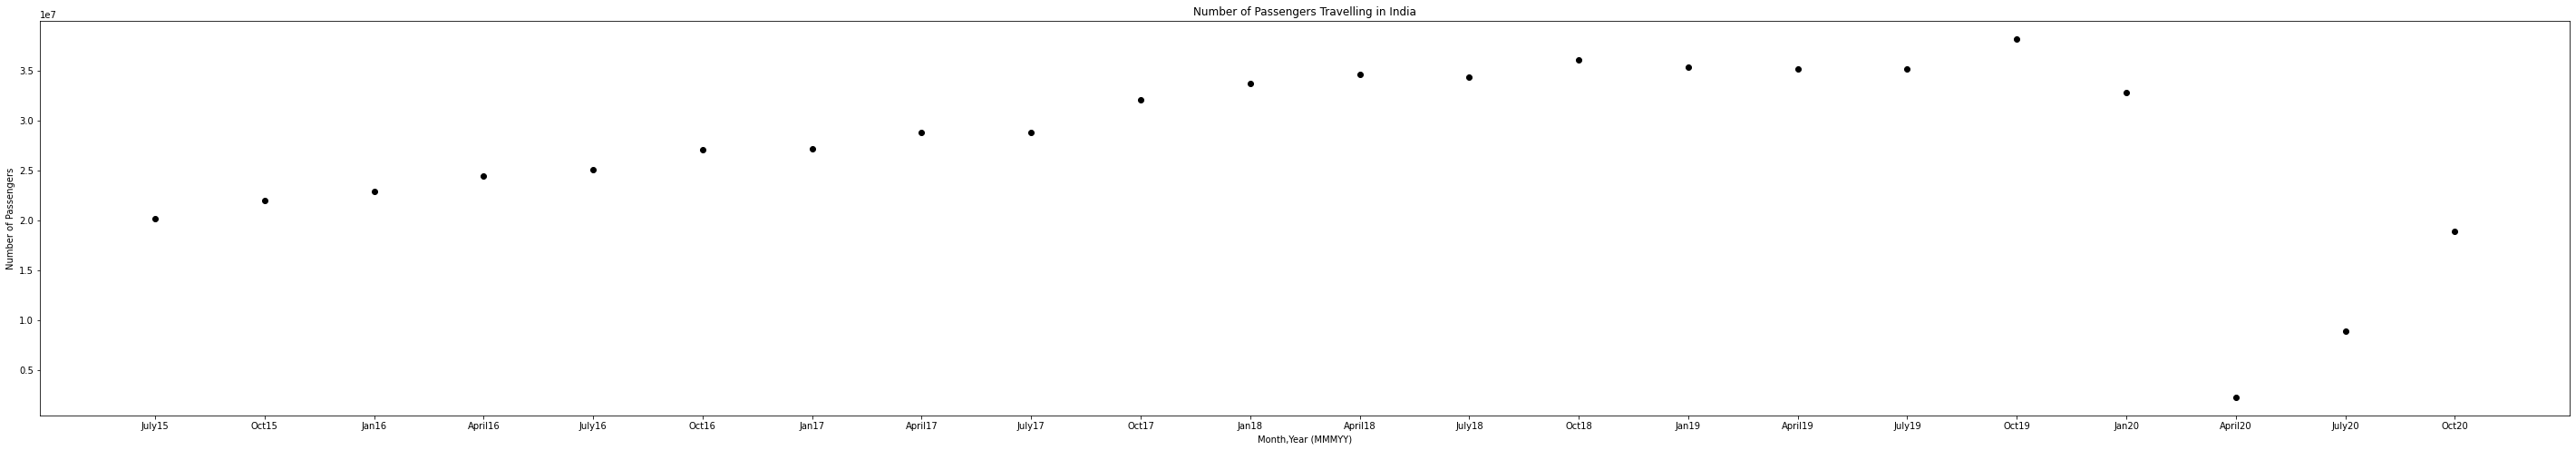

In [15]:
plt.scatter(lbls1, passengers, color="black",  marker="o")
plt.xlabel("Month,Year (MMMYY)")
plt.xticks([i for i in range(graphslen)],labels = lbls1)
plt.ylabel("Number of Passengers")
plt.title("Number of Passengers Travelling in India")
# plt.grid(True)
figure = plt.gcf()
figure.set_size_inches(50, 8)
plt.savefig('Output_Files/matplotlib/passengers')
plt.show()
plt.clf()
plt.close()

excel = pd.read_csv("Raw_Data/coordinates/sorted_coordinates.csv",header=0)
tempcity = list(excel["Cities"])
#print(tempcity)
for i in sorted(airpor.keys()):
    if i not in tempcity:
        print(i)

In [16]:
for i in range(len(graphs)):
    print(lbls1[i])
    G = graphs[i]
    betweenness_dict = nx.betweenness_centrality(G)
    nx.set_node_attributes(G, betweenness_dict, 'betweenness')
    
    sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

#     sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

    print("Top 10 nodes")
    
    for i in range(len(sorted_betweenness[:10])):
        print(sorted_betweenness[i][0] + " -> " + str(sorted_betweenness[i][1]))


July15
Top 10 nodes
DELHI -> 0.3314624988638475
MUMBAI -> 0.2217312983109686
BENGALURU -> 0.2024353061191223
KOLKATA -> 0.15735029807207626
CHENNAI -> 0.08266416770412774
HYDERABAD -> 0.04190168643839973
GUWAHATI -> 0.03254028596186438
KHAJURAHO -> 0.012820512820512824
VARANASI -> 0.008853021215658575
KOCHI -> 0.008625835536424943
Oct15
Top 10 nodes
DELHI -> 0.3266131325384572
MUMBAI -> 0.2240319000700067
BENGALURU -> 0.1847725881432307
KOLKATA -> 0.14857490282558636
CHENNAI -> 0.07532059627924292
HYDERABAD -> 0.043367444623425504
GUWAHATI -> 0.03204261799186611
KHAJURAHO -> 0.012987012987012988
VARANASI -> 0.00847709099588799
KOCHI -> 0.007653763984932818
Jan16
Top 10 nodes
DELHI -> 0.36296573443941865
MUMBAI -> 0.22767052414420838
KOLKATA -> 0.1409597490650122
BENGALURU -> 0.12538923715239497
CHENNAI -> 0.0800941995941996
HYDERABAD -> 0.03873124220492643
GUWAHATI -> 0.027087728719307657
KHAJURAHO -> 0.013153153153153154
KOCHI -> 0.008550983050983054
VARANASI -> 0.00787129987129987
Ap

{'2015-07-01': -0.5376320046467173, '2015-10-01': -0.5325884454503721, '2016-01-01': -0.512040864234352, '2016-04-01': -0.4989210246444941, '2016-07-01': -0.5039005999858753, '2016-10-01': -0.49496954151496136, '2017-01-01': -0.48403138281651376, '2017-04-01': -0.4760203715289098, '2017-07-01': -0.473497700596231, '2017-10-01': -0.47508547617115315, '2018-01-01': -0.4773775182615342, '2018-04-01': -0.4504819800845207, '2018-07-01': -0.4615261662613445, '2018-10-01': -0.49112888135848837, '2019-01-01': -0.4773025305409154, '2019-04-01': -0.45274135908567753, '2019-07-01': -0.4564615984101939, '2019-10-01': -0.4345045243397757, '2020-01-01': -0.44182113519957317, '2020-04-01': -0.49763531617624923, '2020-07-01': -0.5244746121721012, '2020-10-01': -0.5231777874875979}


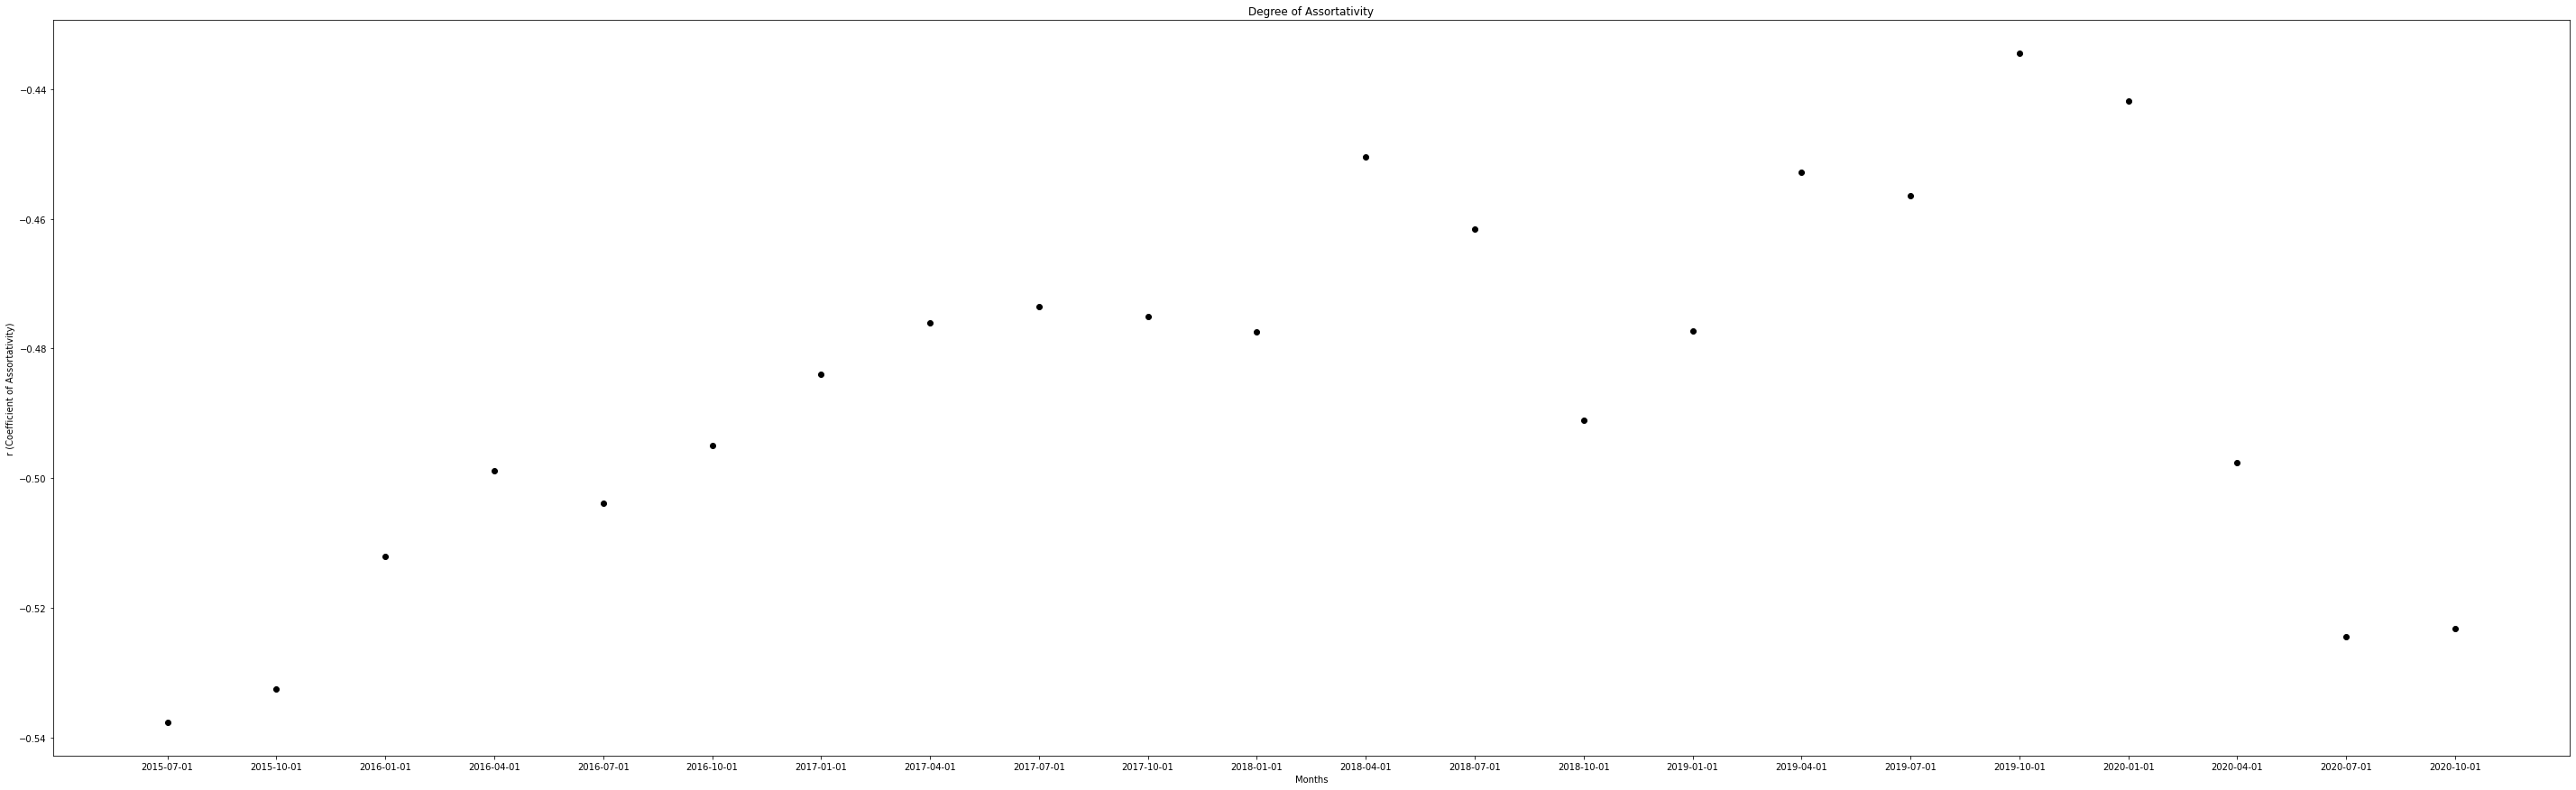

In [17]:
assortativity = {}
for i in range(len(graphs)):
    G = graphs[i]
    try:
        pearson = nx.degree_pearson_correlation_coefficient(G)
        assortativity[lbls2[i]] = pearson
    except:
        print(lbls1[i])
print(assortativity)

plt.figure(figsize = (50, 15)) 
# plt.bar(range(len(assortativity)), list(assortativity.values()), align='center')
plt.scatter(range(len(assortativity)), list(assortativity.values()), color="black",  marker="o")
plt.title("Degree of Assortativity")
plt.xlabel("Months")
plt.ylabel("r (Coefficient of Assortativity)")
plt.xticks(range(len(assortativity)), list(assortativity.keys()))
plt.savefig('Output_Files/matplotlib/Assortativity')
plt.show()

Degree Distribution

July15


Average clustering coefficient for July15 is 0.681949906488112
Oct15


Average clustering coefficient for Oct15 is 0.7042012673500759
Jan16


Average clustering coefficient for Jan16 is 0.6881967486138891
April16


Average clustering coefficient for April16 is 0.6270535447095115
July16


Average clustering coefficient for July16 is 0.6211002084354253
Oct16


Average clustering coefficient for Oct16 is 0.6128739037859432
Jan17


Average clustering coefficient for Jan17 is 0.6360817033885142
April17


Average clustering coefficient for April17 is 0.5922923174376129
July17


Average clustering coefficient for July17 is 0.566303828892411
Oct17


Average clustering coefficient for Oct17 is 0.5960873299164012
Jan18


Average clustering coefficient for Jan18 is 0.6368072725891741
April18


Average clustering coefficient for April18 is 0.643233223544651
July18


Average clustering coefficient for July18 is 0.6157660385118316
Oct18


Average clustering coefficient for Oct18 is 0.659761

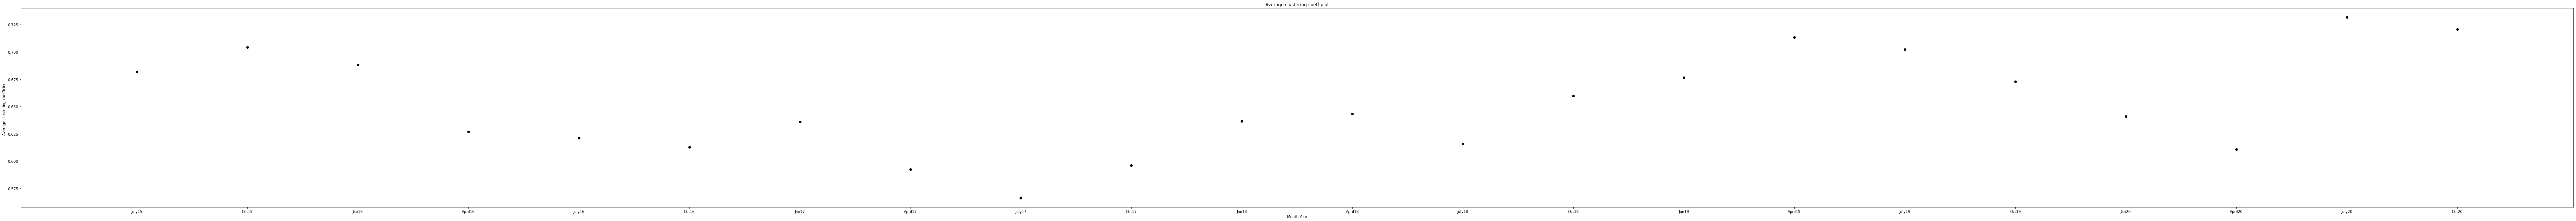

3654

In [18]:
avg_clust_coeff_list = []
def haha(gi):
    print(lbls1[gi])
    G = graphs[gi]
    degree_dict = dict(G.degree(G.nodes()))
    nx.set_node_attributes(G, degree_dict, 'degree')
   
    sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
    
    
    plt.figure(figsize = (100, 10))
    plt.scatter([y[0] for y in sorted_degree], [y[1] for y in sorted_degree], color="black",  marker="o")
    plt.title("Degree sequence for " + lbls1[gi])
    plt.xticks([i for i in range(len(sorted_degree))],labels =[x[0][:10] for x in sorted_degree] )
    plt.grid(True)
    plt.savefig('Output_Files/matplotlib/Degree/ ' + lbls1[gi])
#     plt.show()
    plt.clf()
    plt.close("all")
    print("\n")
    gc.collect()
    
    
    
    
    clust_coefficients = nx.clustering(G)
    sorted_clust_coefficients = dict(sorted(clust_coefficients.items(), key=itemgetter(1), reverse=True))
    
    
    plt.figure(figsize=(100, 10))
    plt.title("Clustering plot for " + lbls1[gi])
    plt.scatter(sorted_clust_coefficients.keys(), sorted_clust_coefficients.values(), color="black",  marker="o")
    plt.savefig('Output_Files/matplotlib/Clust_seq/ ' + lbls1[gi])
#     plt.show()
    plt.clf()
    plt.close("all")
    gc.collect()
    
    
    avg_clust_coeff = sum(clust_coefficients.values()) / len(clust_coefficients)  
    avg_clust_coeff_list.append(avg_clust_coeff)
    
    
    
    plt.figure(figsize = (100, 10))
    plt.title("Degree distribution for " + lbls1[gi])
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.grid(True)    
    degree_counter = collections.Counter(degree_dict.values())
    degree_counter = dict(sorted(degree_counter.items(), key=itemgetter(0)))
    plt.scatter(degree_counter.keys(), degree_counter.values(), color="black",  marker="o")
#     for key in degree_counter.keys():
#         plt.plot(key, degree_counter[key], color="red",  marker="o")
    plt.xticks([t for t in range(max(degree_counter.keys())+1)])        
#     plt.show()
    plt.savefig('Output_Files/matplotlib/Degree_Dist/ ' + lbls1[gi])
    plt.clf()
    plt.close("all")
    gc.collect()
    
    cum_degree = {}
    for i in range(len(degree_counter)):
        cum_degree[list(degree_counter.keys())[i]]= sum(list(degree_counter.values())[i:])/sum(list(degree_counter.values()))
#     print(cum_degree)
   
    plt.figure()
    plt.title("Cumulative degree distribution for " + lbls1[gi])
    plt.xlabel("Degree(k)")
    plt.ylabel("P(>k)")
    plt.xscale("log")
    plt.yscale("log")
    plt.grid(True, which="both")    
    plt.scatter(cum_degree.keys(), cum_degree.values(), color="black",  marker="o")    
    plt.savefig('Output_Files/matplotlib/Cum_Degree_Dist/ ' + lbls1[gi])
    plt.clf()
    plt.close("all")
    gc.collect()
    
    
    
    plt.figure()
#     TODO: increase figsize
    plt.title("Clustering coeff vs Degree plot for " + lbls1[gi])
    plt.xlabel("Degree")
    plt.ylabel("Clustering coefficient")
    plt.xscale("log")
    plt.yscale("log")
    plt.grid(True, which="both")

    for city in clust_coefficients.keys():
        plt.plot(degree_dict[city], clust_coefficients[city], color="black",  marker="o", markersize=0.5)

    plt.savefig('Output_Files/matplotlib/Ck_plots/ ' + lbls1[gi])
    plt.clf()
    plt.close()
    gc.collect()
    plt.close('all')     
    
    print("Average clustering coefficient for", lbls1[gi], "is", avg_clust_coeff)
    
    
for gi in range(len(graphs)):
    plt.ioff()
    haha(gi)
    gc.collect()

    
plt.figure(figsize = (125, 10))
plt.title("Average clustering coeff plot")
plt.xlabel("Month Year")
plt.ylabel("Average clustering coefficient")
# plt.grid(True)
plt.scatter(lbls1, avg_clust_coeff_list, color="black",  marker="o")
plt.savefig('Output_Files/matplotlib/Average CLustering Coeff ')
plt.show()
plt.clf()
plt.close('all')
gc.collect()



In [19]:
# # TODO: plots for in and out degree
# for G in graphs:
#     in_degree_freq = nx.degree_histogram(G)
#     out_degree_freq = nx.degree_histogram(G, out_degree=True)
#     degrees = range(len(in_degree_freq))
#     plt.figure(figsize=(12, 8)) 
#     plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label='in-degree') 
#     plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='out-degree')
#     plt.xlabel('Degree')
#     plt.ylabel('Frequency')
#     plt.show()
#     plt.close()
#     plt.clf()


{1: 605, 2: 4309, 3: 1226, 4: 22}
Characteristic Path length for 1507  is  2.1079195066536838


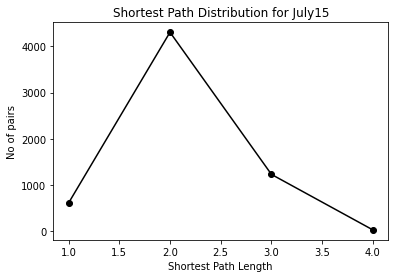



{1: 636, 2: 4325, 3: 1026, 4: 19}
Characteristic Path length for 1510  is  2.0712620712620713


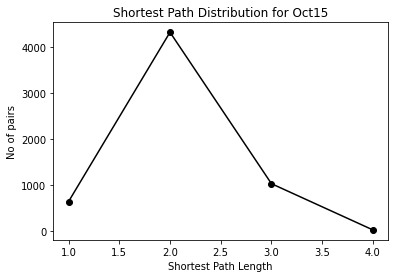



{1: 623, 2: 4091, 3: 895, 4: 16}
Characteristic Path length for 1601  is  2.027017543859649


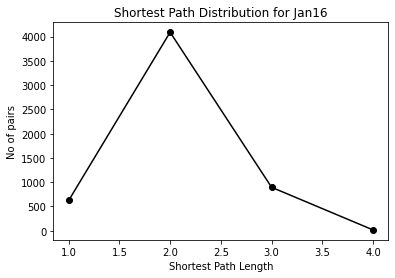



{1: 629, 2: 3815, 3: 835, 4: 49}
Characteristic Path length for 1604  is  1.9747747747747748


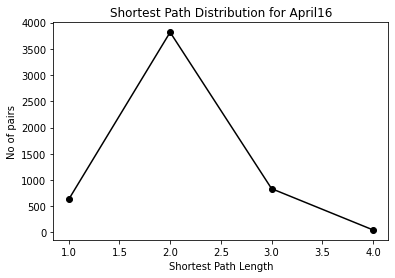



{1: 611, 2: 3688, 3: 884, 4: 73}
Characteristic Path length for 1607  is  2.079718417047184


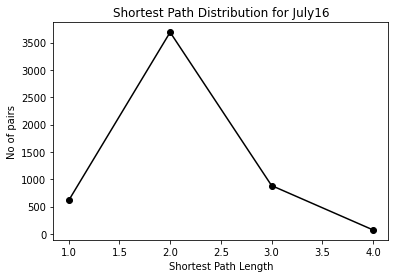



{1: 639, 2: 3951, 3: 1072, 4: 38}
Characteristic Path length for 1610  is  2.089298245614035


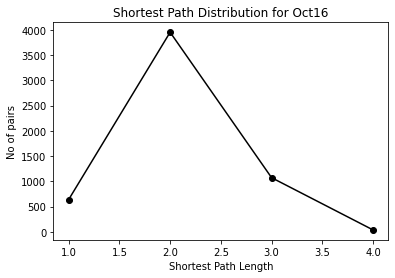



{1: 669, 2: 4100, 3: 915, 4: 16}
Characteristic Path length for 1701  is  2.0487719298245612


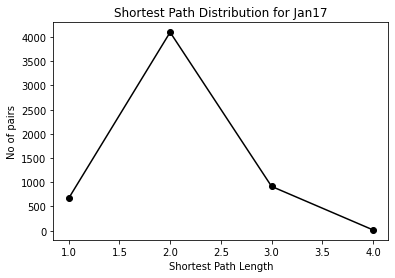



{1: 692, 2: 4355, 3: 1096, 4: 19}
Characteristic Path length for 1704  is  2.071729957805907


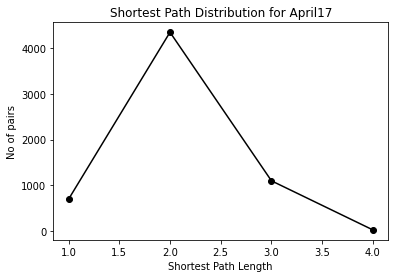



{1: 725, 2: 4805, 3: 1419, 4: 23}
Characteristic Path length for 1707  is  2.1061388410786


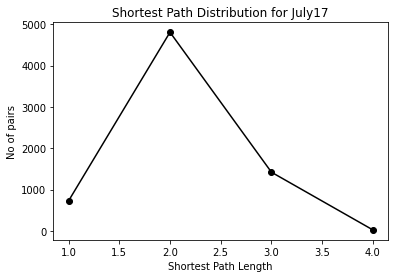



{1: 811, 2: 5342, 3: 1503}
Characteristic Path length for 1710  is  2.0903866248693834


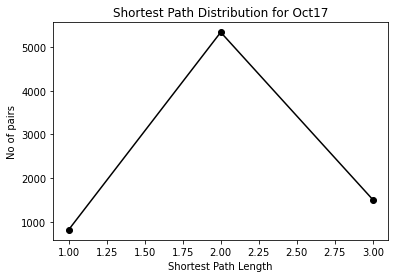



{1: 881, 2: 5613, 3: 1515, 4: 1}
Characteristic Path length for 1801  is  2.0794007490636703


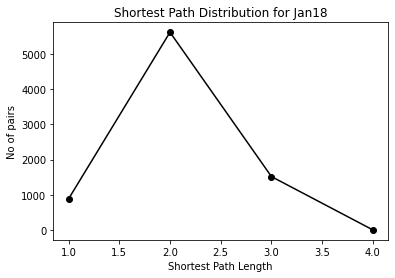



{1: 899, 2: 6386, 3: 1810, 4: 25}
Characteristic Path length for 1804  is  2.105372807017544


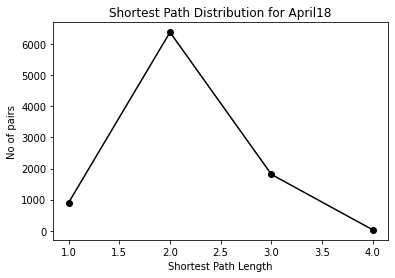



{1: 902, 2: 6332, 3: 2021, 4: 57}
Characteristic Path length for 1807  is  2.132409793814433


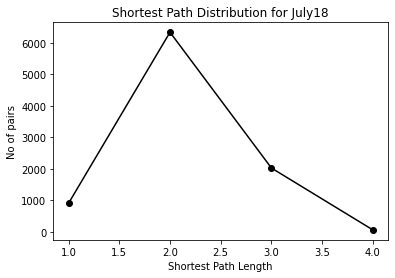



{1: 971, 2: 6757, 3: 1681}
Characteristic Path length for 1810  is  2.054281506417


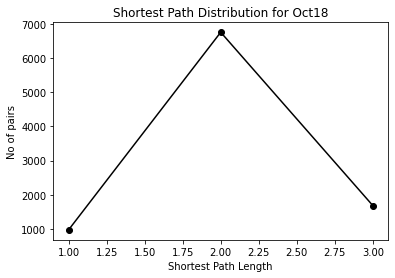



{1: 1018, 2: 6818, 3: 1809, 4: 57}
Characteristic Path length for 1901  is  2.093279736136879


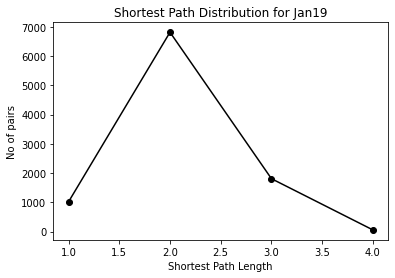



{1: 988, 2: 6700, 3: 1770, 4: 48}
Characteristic Path length for 1904  is  2.0923627182831894


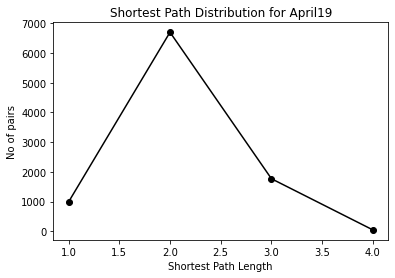



{1: 986, 2: 6808, 3: 1895, 4: 13}
Characteristic Path length for 1907  is  2.0963718820861676


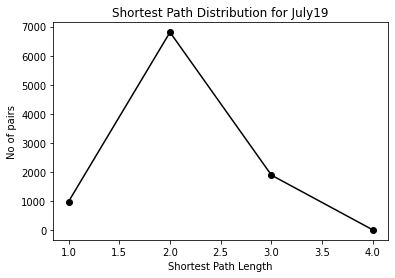



{1: 1068, 2: 7093, 3: 1897, 4: 42}
Characteristic Path length for 1910  is  2.0903960396039603


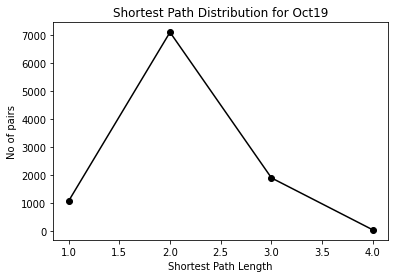



{1: 1068, 2: 7144, 3: 2247, 4: 47}
Characteristic Path length for 2001  is  2.121168855891871


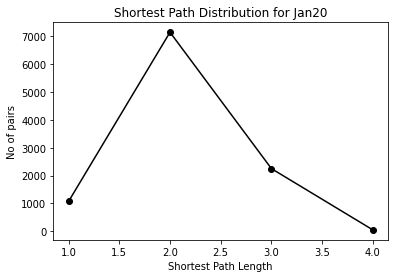



{1: 601, 2: 4878, 3: 2432, 4: 245, 5: 34, 6: 1}
Characteristic Path length for 2004  is  2.2466555183946486


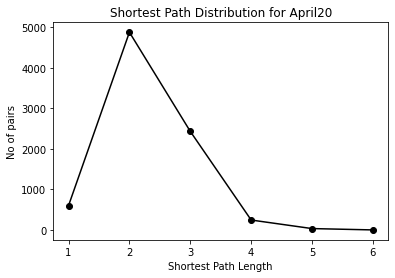



{1: 834, 2: 6189, 3: 1961, 4: 41}
Characteristic Path length for 2007  is  2.1117324561403508


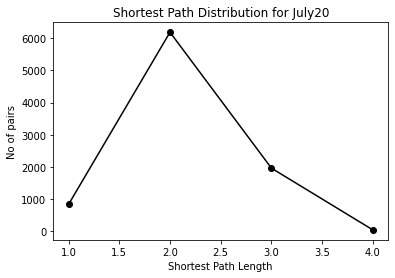



{1: 956, 2: 6870, 3: 1596, 4: 83, 5: 1}
Characteristic Path length for 2010  is  2.0851041447506837


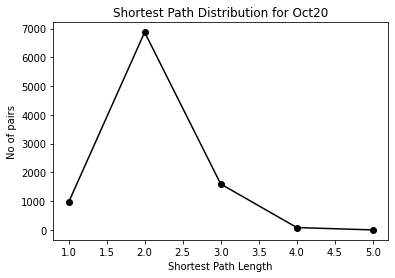

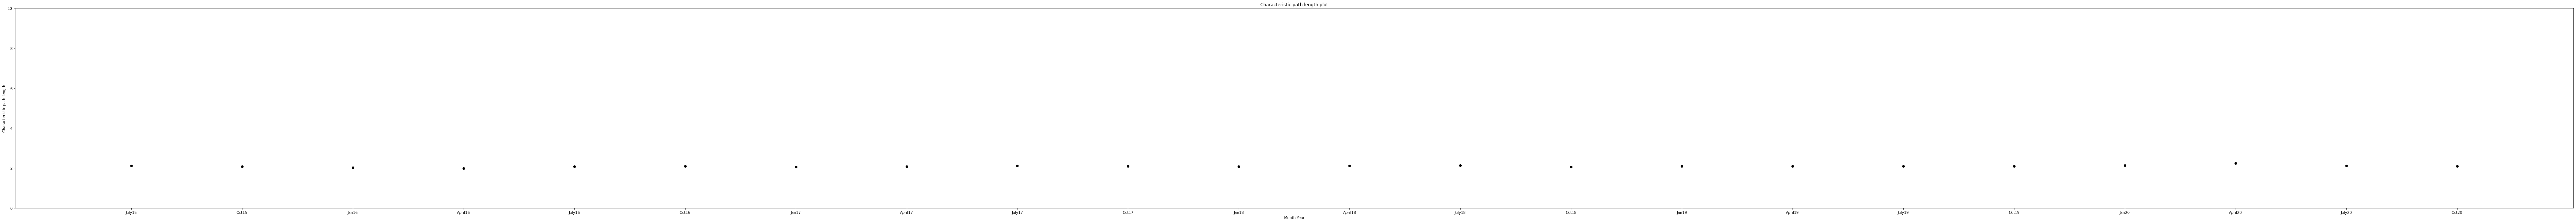

3486

In [20]:
char_path_len_list = []

for i in range(len(graphs)):
    G = graphs[i]
    d_shortest_path = {}
    all_pairs = (nx.all_pairs_shortest_path_length(G,cutoff=None))
    for pair in all_pairs:
#         print(len(pair[1]))
        for dist in pair[1].values():
            if dist != 0:
                if dist in d_shortest_path:
                    d_shortest_path[dist] += 1
                else:
                    d_shortest_path[dist] = 1
                
    print(d_shortest_path)
#     print(sum(d_shortest_path.values()))
    try:
        char_path_len_list.append(nx.average_shortest_path_length(G))
        print("Characteristic Path length for",lbls[i]," is ",char_path_len_list[-1])
#         print("Characteristic Path length for",lbls[i]," is ",nx.average_shortest_path_length(G)) 
    except:
        char_path_len_list.append(None)
        print("Characteristic Path length for",lbls[i]," can't be defined")
        
    plt.figure()
    plt.title("Shortest Path Distribution for " + lbls1[i])
    plt.xlabel("Shortest Path Length")
    plt.ylabel("No of pairs")
    plt.plot(d_shortest_path.keys(),d_shortest_path.values(), color="black",  marker="o")

    plt.savefig('Output_Files/matplotlib/Shortest_Path_Dist/ ' + lbls1[i])
    plt.show()
    plt.clf()
    plt.close()
    print("\n")
    gc.collect()

plt.figure(figsize = (125, 10))
plt.title("Characteristic path length plot")
plt.xlabel("Month Year")
plt.ylabel("Characteristic path length")
plt.ylim(0,10)
plt.scatter(lbls1, char_path_len_list, color="black",  marker="o")
plt.savefig('Output_Files/matplotlib/Characteristic path length')
plt.show()
plt.clf()
plt.close('all')
gc.collect()



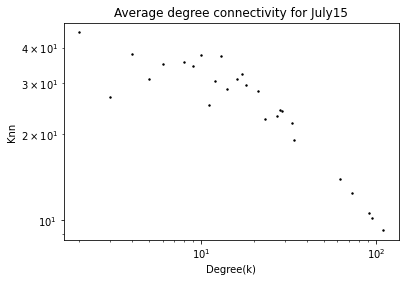

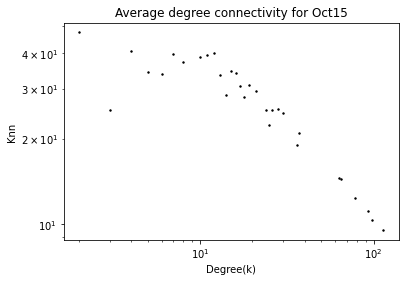

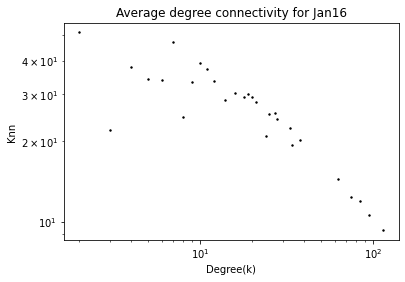

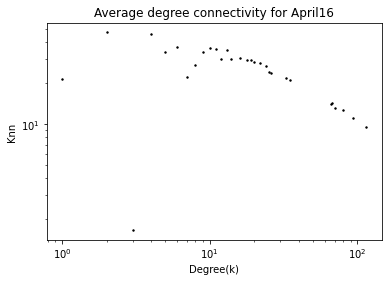

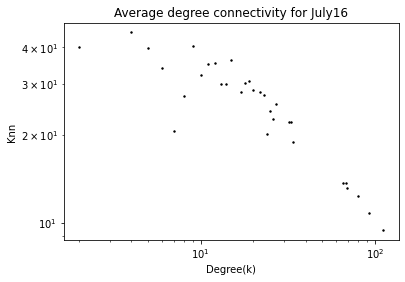

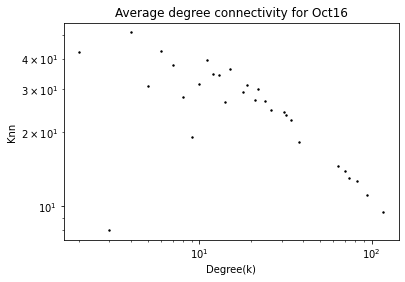

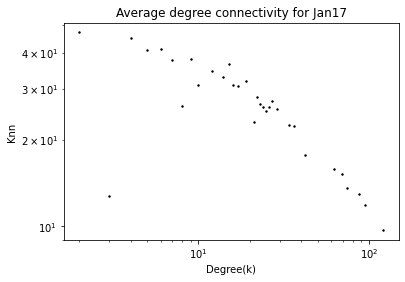

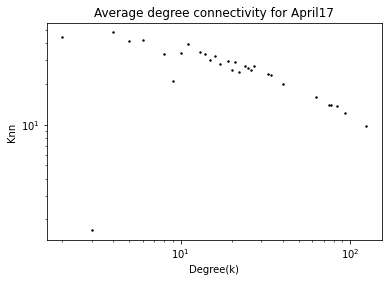

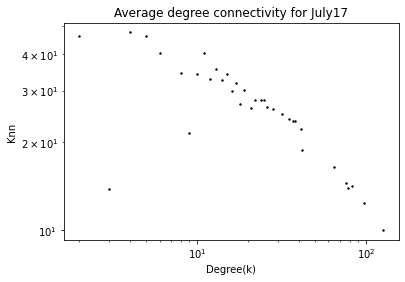

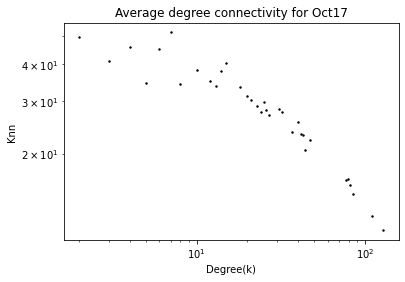

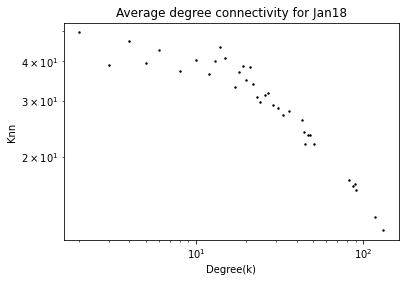

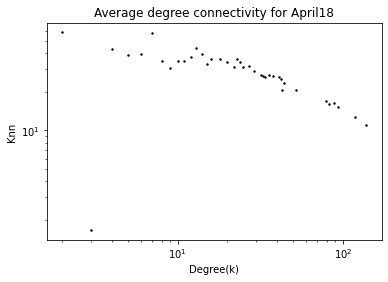

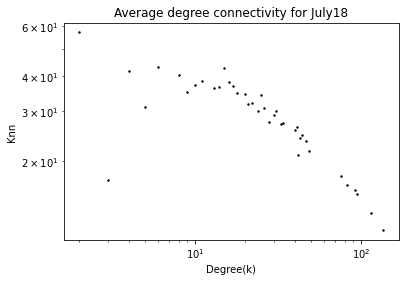

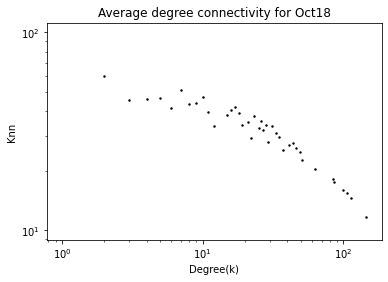

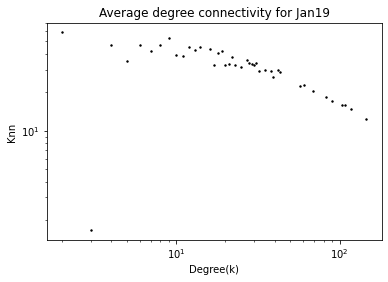

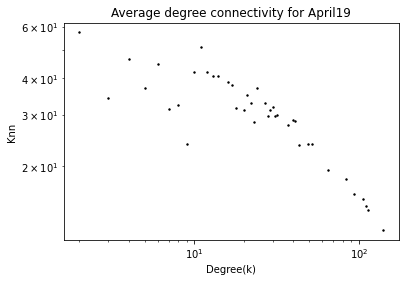

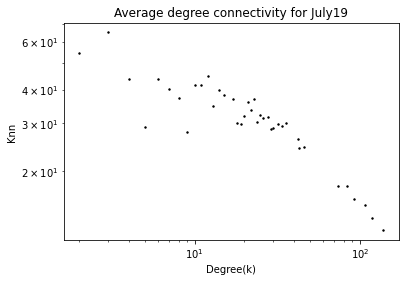

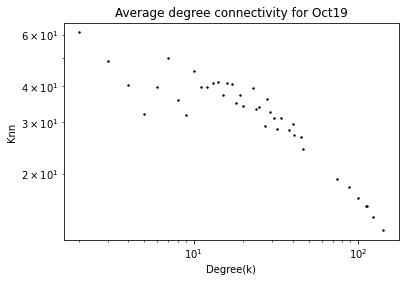

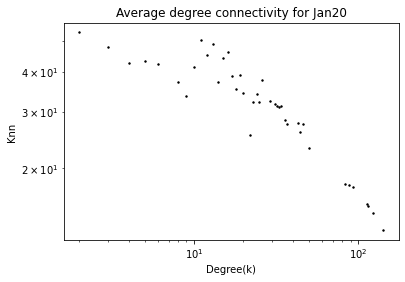

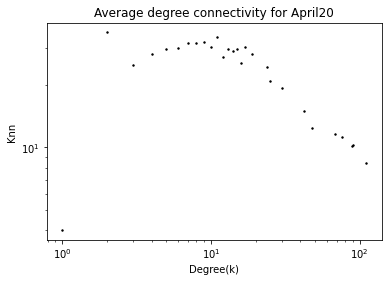

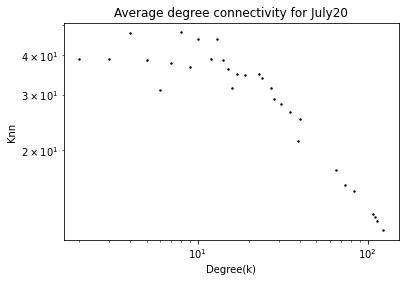

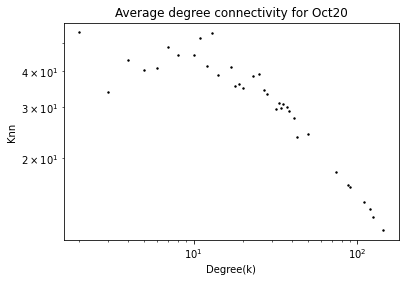

In [21]:
for i in range(len(graphs)):
    G = graphs[i]
    plt.figure()
    plt.title("Average degree connectivity for " + lbls1[i])
    plt.xlabel("Degree(k)")
    plt.ylabel("Knn")
    plt.xscale("log")
    plt.yscale("log")
    #plt.grid(True, which="both")
    k_knn = nx.k_nearest_neighbors(G)
    plt.scatter(k_knn.keys(), k_knn.values(), color="black",  marker="o", s=2)
#     plt.xticks([t for t in range(max(k_knn.keys())+1)])        
    plt.savefig('Output_Files/matplotlib/Knn vs k/' + lbls1[i])
    plt.show()
    plt.clf()
    plt.close('all')
    gc.collect()